## Code for computing the structure function (given a light curve)
In this demonstration, we will use the following definition for SF:

$$\operatorname{SF}^{2}(\Delta t)=\frac{1}{P} \sum_{i, j>i}^{P}\left(m_{i}-m_{j}\right)^{2}-\sigma_{i}^{2}-\sigma_{j}^{2}$$

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.facecolor"] = "white"
from scipy.stats import binned_statistic

# eztao for simulation DRW
from eztao.carma import DRW_term
from eztao.ts import gpSimRand

import CalculateSF

### 1. Develop using Gaussian random noise

In [3]:
# generate gaussian random time series
size=1000
t = np.random.uniform(size=size)*3000
t = t[np.argsort(t)]
y = np.random.normal(scale=1, size=size)[np.argsort(t)]
yerr = np.random.normal(scale=0.05, size=size)[np.argsort(t)]

<ErrorbarContainer object of 3 artists>

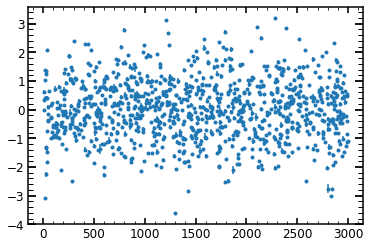

In [4]:
# viz the 'LC'
plt.errorbar(t, y, yerr, fmt='.')

In [5]:
## compute dt and dm for all gaps
# dt
dt_matrix = t.reshape((1, t.size)) - t.reshape((t.size, 1))
dts = dt_matrix[dt_matrix > 0].flatten().astype(np.float16)

# dm
dm_matrix = y.reshape((1, y.size)) - y.reshape((y.size, 1))
dms = dm_matrix[dt_matrix > 0].flatten().astype(np.float16)

# err^2
err2_matrix = yerr.reshape((1, yerr.size))**2 + yerr.reshape((yerr.size, 1))**2
err2s = err2_matrix[dt_matrix > 0].flatten().astype(np.float16)

In [6]:
## SF for each pair of observations, will give underflow error given limited precision
sfs = dms**2 - err2s

/var/folders/t5/wsx3rfv52lj4xzmnd7ywbq0h0000gn/T/ipykernel_15406/3706756829.py:2: RuntimeWarning: underflow encountered in square
  sfs = dms**2 - err2s


In [7]:
## bin sfs by dts using log_dt bins
max_dt = 3500 # arbitrary
log_bins = np.logspace(np.log10(dts.min())-0.1, np.log10(max_dt)+0.1, 50)

# the line below will throw error if the bins are not covering the whole range
SFs, bin_edgs, _ = binned_statistic(dts, sfs, 'mean', log_bins)

/opt/miniconda3/envs/env_var/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Text(0.5, 1.0, 'SF for a gaussian white noise')

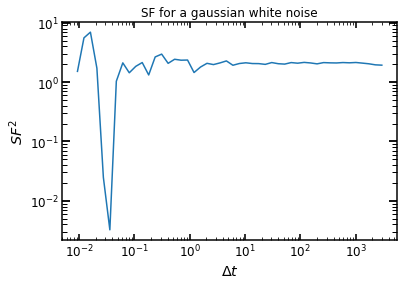

In [8]:
bin_cents = (bin_edgs[0:-1] + bin_edgs[1:])/2
plt.loglog(bin_cents, SFs)
plt.xlabel('$\Delta t$')
plt.ylabel('$SF^2$')
plt.title('SF for a gaussian white noise')

### 2. Test on simulated DRW

In [9]:
amp = 0.2
tau = 100
DRW_kernel = DRW_term(np.log(amp), np.log(tau))
t, y, yerr = gpSimRand(DRW_kernel, 10, 365*10, 1000)

<ErrorbarContainer object of 3 artists>

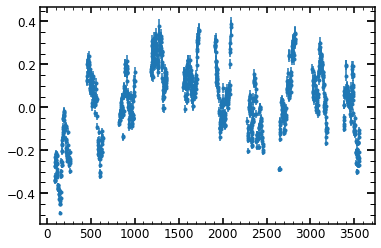

In [10]:
# vis drw lc
plt.errorbar(t, y, yerr, fmt='.')

In [11]:
def sf2(t, y, yerr, bins):
    """Calculate structure function squared

    Short description goes here

    Parameters
    ----------
    t : `np.array` [`float`]
        Times at which the measurment was conducted
    y : `np.array` [`float`]
        Measurment values
    yerr : `np.array` [`float`]
        Measurment errors
    bins:  `np.array` [`float`]

    Returns
    ----------
    SF, bin_edge : 
    
    Notes
    ----------
   
    TODO:
    ----------
    - allow user to not specify bins - automatically assume ``reasonable bins''
    - allow user to not specify times - assume equivdistant times
    - allow multiple inputs, with same <t> at once
    - ability to create SF2 from multipl lightcurves at once (ensamble)
    - allow for different definition of SF2
    
    """
    
    
    
    ## compute dt and dm for all gaps
    # dt
    dt_matrix = t.reshape((1, t.size)) - t.reshape((t.size, 1))
    dts = dt_matrix[dt_matrix > 0].flatten().astype(np.float16)

    # dm
    dm_matrix = y.reshape((1, y.size)) - y.reshape((y.size, 1))
    dms = dm_matrix[dt_matrix > 0].flatten().astype(np.float16)

    # err^2
    err2_matrix = yerr.reshape((1, yerr.size))**2 + yerr.reshape((yerr.size, 1))**2
    err2s = err2_matrix[dt_matrix > 0].flatten().astype(np.float16)
    
    ## SF for each pair of observations
    sfs = dms**2 - err2s
    
    # SF for at specific dt
    # the line below will throw error if the bins are not covering the whole range
    SFs, bin_edgs, _ = binned_statistic(dts, sfs, 'mean', bins)

    return SFs, (bin_edgs[0:-1] + bin_edgs[1:])/2

In [12]:
min_dt = np.diff(t).min()
max_dt = t[-1] - t[0]
log_bins = np.logspace(np.log10(min_dt)-0.1, np.log10(max_dt)+0.1, 20)

#### Compute SF^2 and plot

/var/folders/t5/wsx3rfv52lj4xzmnd7ywbq0h0000gn/T/ipykernel_15406/296440999.py:49: RuntimeWarning: underflow encountered in square
  sfs = dms**2 - err2s
/opt/miniconda3/envs/env_var/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in multiply
  return bound(*args, **kwds)


Text(0.5, 1.0, 'SF for a DRW')

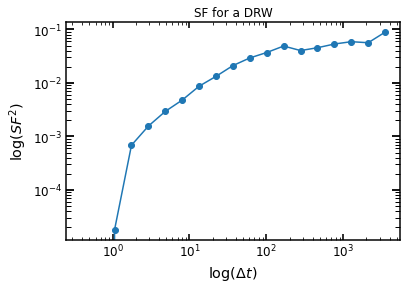

In [13]:
SF, b_cent = sf2(t, y, yerr, log_bins) 
plt.loglog(b_cent, SF,marker = 'o')
plt.xlabel('log($\Delta t$)')
plt.ylabel('log($SF^2$)')
plt.title('SF for a DRW')

In [14]:
SF

array([-5.70485011e-04, -3.24762145e-04,  1.79339858e-05,  6.84566521e-04,
        1.56114610e-03,  2.93340110e-03,  4.77759661e-03,  8.67946868e-03,
        1.32667541e-02,  2.10768929e-02,  2.92978405e-02,  3.70121872e-02,
        4.89188815e-02,  4.02521509e-02,  4.54728974e-02,  5.33194646e-02,
        5.89783937e-02,  5.63516277e-02,  8.89275294e-02])

In [15]:
b_cent

array([3.8550e-01, 6.3965e-01, 1.0605e+00, 1.7607e+00, 2.9219e+00,
       4.8438e+00, 8.0391e+00, 1.3336e+01, 2.2125e+01, 3.6688e+01,
       6.0875e+01, 1.0100e+02, 1.6762e+02, 2.7800e+02, 4.6125e+02,
       7.6500e+02, 1.2690e+03, 2.1060e+03, 3.4940e+03], dtype=float16)

In [16]:
log_bins

array([2.89958802e-01, 4.81041756e-01, 7.98048446e-01, 1.32396266e+00,
       2.19645453e+00, 3.64391885e+00, 6.04526267e+00, 1.00290929e+01,
       1.66382688e+01, 2.76028939e+01, 4.57932109e+01, 7.59709533e+01,
       1.26035839e+02, 2.09093502e+02, 3.46886195e+02, 5.75484322e+02,
       9.54728696e+02, 1.58389525e+03, 2.62768279e+03, 4.35932669e+03])